In [37]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Fault Areas

In [30]:
data_areas = gpd.read_file('Qfaults_2018_shapefile/qfault_areas.shp')
data_areas

,fault_id,section_id,fault_area,age,slipsense,cooperator,url,ref_id,Shape_Leng,Shape_Area,geometry
0,924,None,"Gulf-margin normal faults, Texas",Class B,Normal,U.S. Geological Survey,https://earthquake.usgs.gov/cfusion/qfault/sho...,924,3.486395e+06,4.008565e+11,POLYGON ((-94.07141736074814 33.43044922223294...
1,1022,None,"Gulf-margin normal faults, Louisiana and Arkansas",Class B,Normal,U.S. Geological Survey,https://earthquake.usgs.gov/cfusion/qfault/sho...,1022,2.629534e+06,2.213205e+11,POLYGON ((-94.07141736074814 33.43044922223294...
2,1023,None,Reelfoot scarp and New Madrid seismic zone,historic,Right lateral,U.S. Geological Survey,https://earthquake.usgs.gov/cfusion/qfault/sho...,1023,6.182840e+05,1.291146e+10,POLYGON ((-89.62051671999586 36.38184695880091...
3,1023,None,Reelfoot scarp and New Madrid seismic zone,historic,Right lateral,U.S. Geological Survey,https://earthquake.usgs.gov/cfusion/qfault/sho...,1023,2.450726e+05,9.707625e+08,POLYGON ((-89.40953528778994 36.21071273326238...
4,1023,None,Reelfoot scarp and New Madrid seismic zone,historic,Right lateral,U.S. Geological Survey,https://earthquake.usgs.gov/cfusion/qfault/sho...,1023,1.363163e+05,1.006530e+09,POLYGON ((-89.38184079441747 36.72482235397989...
5,1023,None,Reelfoot scarp and New Madrid seismic zone,historic,Right lateral,U.S. Geological Survey,https://earthquake.usgs.gov/cfusion/qfault/sho...,1023,2.199919e+04,2.326396e+07,POLYGON ((-89.32851712793553 36.56994593705066...
6,1024,None,Wabash Valley liquefaction features,latest Quaternary,No data,U.S. Geological Survey,https://earthquake.usgs.gov/cfusion/qfault/sho...,1024,1.533637e+06,1.035110e+11,POLYGON ((-88.94990345480734 37.28330131193474...
7,1025,None,Monroe uplift,Class B,No data,U.S. Geological Survey,https://earthquake.usgs.gov/cfusion/qfault/sho...,1025,4.552809e+05,1.442280e+10,POLYGON ((-91.66188277440949 33.19991929525982...
8,1026,None,Saline River fault zone,Class B,Various,U.S. Geological Survey,https://earthquake.usgs.gov/cfusion/qfault/sho...,1026,2.050979e+05,3.305766e+09,POLYGON ((-91.61200971030873 33.41659576192432...
9,1027,a,Faults of Thebes Gap area,latest Quaternary,Various,U.S. Geological Survey,https://earthquake.usgs.gov/cfusion/qfault/sho...,1027a,8.049016e+04,4.301165e+08,POLYGON ((-89.62373618315948 37.12317003606263...


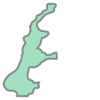

In [35]:
data_areas.loc[3, 'geometry']

California

In [44]:
california = gpd.read_file('s7059k.shp')

DriverError: Unable to open s7059k.shx or s7059k.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [26]:
data_csv = pd.read_csv('Qfaults_2018_shapefile/Qfaults_2018_shapefile.csv')
print(data_csv.columns)
len(data_csv.columns)

Index(['fault', 'section', 'age', 'dip_direct', 'slip_rate', 'slip_sense',
       'scale', 'class', 'certainty', 'strike', 'cooperator', 'earthquake',
       'ref_id', 'fault_url', 'fault_id', 'section_id', 'symbology',
       'Shape_Leng'],
      dtype='object')


18

In [18]:
data_gdb = gpd.read_file('QFaults_2018.gdb')
print(data_gdb.columns)
len(data_shp_all.columns)

Index(['fault', 'section', 'age', 'dip_direction', 'slip_rate', 'slip_sense',
       'mapped_scale', 'class', 'mapped_certainty', 'strike', 'cooperators',
       'earthquake', 'ref_id', 'fault_url', 'symbology', 'Shape_Length',
       'geometry'],
      dtype='object')


19

In [ ]:
%matplotlib inline
data_shp.plot()

## Fault Lines

In [27]:
data_shp_all = gpd.read_file('Qfaults_2018_shapefile/Qfaults_2018_shapefile.shp')
print(data_shp_all.columns)
data_shp_all.index.name = 'Index'
# data_shp_all
# data_shp_all.to_csv('southern_cal_faults_USGS.csv'
# data_shp_all[data_shp_all['ref_id'] == '1h']

Index(['fault', 'section', 'age', 'dip_direct', 'slip_rate', 'slip_sense',
       'scale', 'class', 'certainty', 'strike', 'cooperator', 'earthquake',
       'ref_id', 'fault_url', 'fault_id', 'section_id', 'symbology',
       'Shape_Leng', 'geometry'],
      dtype='object')


In [28]:
data_shp_all

,fault,section,age,dip_direct,slip_rate,slip_sense,scale,class,certainty,strike,cooperator,earthquake,ref_id,fault_url,fault_id,section_id,symbology,Shape_Leng,geometry
Index,,,,,,,,,,,,,,,,,,,
0,Goose Lake graben faults (Goose Lake fault),None,late Quaternary,W,Less than 0.2 mm/yr,Normal,"1:250,000",A,Good,None,California Geological Survey,None,828,https://earthquake.usgs.gov/cfusion/qfault/sho...,828,None,late Quaternary Well Constrained,4804.373579,"LINESTRING (-120.284993 41.89968100000002, -12..."
1,Goose Lake graben faults (Goose Lake fault),None,late Quaternary,W,Less than 0.2 mm/yr,Normal,"1:250,000",A,Good,None,California Geological Survey,None,828,https://earthquake.usgs.gov/cfusion/qfault/sho...,828,None,late Quaternary Well Constrained,7612.099137,"LINESTRING (-120.201349 41.84413400000015, -12..."
2,Goose Lake graben faults (Goose Lake fault),None,late Quaternary,W,Less than 0.2 mm/yr,Normal,"1:250,000",A,Good,None,California Geological Survey,None,828,https://earthquake.usgs.gov/cfusion/qfault/sho...,828,None,late Quaternary Well Constrained,1697.722836,LINESTRING (-120.2111859999999 41.813416000000...
3,Goose Lake graben faults (Goose Lake fault),None,late Quaternary,W,Less than 0.2 mm/yr,Normal,"1:250,000",A,Good,None,California Geological Survey,None,828,https://earthquake.usgs.gov/cfusion/qfault/sho...,828,None,late Quaternary Well Constrained,7135.032799,"LINESTRING (-120.201349 41.84413400000015, -12..."
4,Goose Lake graben faults (Goose Lake fault),None,late Quaternary,W,Less than 0.2 mm/yr,Normal,"1:250,000",A,Good,None,California Geological Survey,None,828,https://earthquake.usgs.gov/cfusion/qfault/sho...,828,None,late Quaternary Well Constrained,3022.325182,LINESTRING (-120.1937069999999 41.824780000000...
5,Goose Lake graben faults (Goose Lake fault),None,late Quaternary,W,Less than 0.2 mm/yr,Normal,"1:250,000",A,Good,None,California Geological Survey,None,828,https://earthquake.usgs.gov/cfusion/qfault/sho...,828,None,late Quaternary Well Constrained,1671.102956,"LINESTRING (-120.181435 41.83778000000004, -12..."
6,Mayfield fault zone,None,late Quaternary,W,Between 1.0 and 5.0 mm/yr,Normal,"1:62,500",A,Good,N15Â°W,California Geological Survey,None,6,https://earthquake.usgs.gov/cfusion/qfault/sho...,6,None,late Quaternary Well Constrained,3908.362840,"LINESTRING (-121.469776 41.23880200000015, -12..."
7,unnamed Fault in the Little San Bernardino Mou...,None,latest Quaternary,None,Unspecified,None,"1:750,000",A,None,None,California Geological Survey,None,213,https://earthquake.usgs.gov/cfusion/qfault/sho...,213,None,latest Quaternary Well Constrained,2650.726677,"LINESTRING (-116.340047 33.91479600000016, -11..."
8,San Andreas fault zone,Shelter Cove Section,undifferentiated Quaternary,Vertical,Greater than 5.0 mm/yr,Right lateral,"1:100,000",A,Good,N12Â°W,California Geological Survey,San Francisco earthquake,1a,https://earthquake.usgs.gov/cfusion/qfault/sho...,1,a,undifferentiated Quaternary Moderately Constra...,42662.214988,"LINESTRING (-124.080434 39.99955100000004, -12..."


In [21]:
info = pd.read_csv('Qfaults_2018_shapefile/section_info.csv', encoding = "ISO-8859-1")
references = pd.read_csv('Qfaults_2018_shapefile/references.csv', encoding = "ISO-8859-1")

In [10]:
info

,OBJECTID,section_name,section_class,section_age,section_dip,section_slip_rate,section_slip_sense,section_strike,earthquake,ref_id,section_url
0,1,Gillem-Big Crack fault system,A,late Quaternary,E,Between 0.2 and 1.0 mm/yr,Normal,NaN,NaN,3,https://earthquake.usgs.gov/cfusion/qfault/sho...
1,2,Lake Abert section,A,latest Quaternary,NW,Between 0.2 and 1.0 mm/yr,Normal; Left lateral,N14°E,NaN,829a,https://earthquake.usgs.gov/cfusion/qfault/sho...
2,3,Lake Abert section,A,latest Quaternary,NW,Between 0.2 and 1.0 mm/yr,Normal; Left lateral,N14°E,NaN,829a,https://earthquake.usgs.gov/cfusion/qfault/sho...
3,4,northern section,A,undifferentiated Quaternary,NW,Less than 0.2 mm/yr,Normal; Left lateral,N17°E,NaN,829b,https://earthquake.usgs.gov/cfusion/qfault/sho...
4,5,Acala fault,A,middle and late Quaternary,SW,Less than 0.2 mm/yr,Normal,N47°W,NaN,903,https://earthquake.usgs.gov/cfusion/qfault/sho...
5,6,Adobe Creek fault,A,NaN,NaN,NaN,Unspecified,NaN,NaN,314,https://earthquake.usgs.gov/cfusion/qfault/sho...
6,7,Adobe Range fault,A,undifferentiated Quaternary,NW,Less than 0.2 mm/yr,Normal,N31°E,NaN,1561,https://earthquake.usgs.gov/cfusion/qfault/sho...
7,8,Agai Pah Hills fault zone,A,undifferentiated Quaternary,E;W,Less than 0.2 mm/yr,Right lateral,N23°W,NaN,1308,https://earthquake.usgs.gov/cfusion/qfault/sho...
8,9,Agate Bay fault,A,undifferentiated Quaternary,NaN,Unspecified,Normal,NaN,NaN,341,https://earthquake.usgs.gov/cfusion/qfault/sho...
9,10,Agua Tibia Mountain fault zone,A,undifferentiated Quaternary,NaN,Unspecified,NaN,NaN,NaN,478,https://earthquake.usgs.gov/cfusion/qfault/sho...


In [11]:
info[info['earthquake'].notnull()]

,OBJECTID,section_name,section_class,section_age,section_dip,section_slip_rate,section_slip_sense,section_strike,earthquake,ref_id,section_url
18,19,Aleutian megathrust,A,historic,NW,Greater than 5.0 mm/yr,Thrust,S. 76° W.,The Alaska earthquake,5269a,https://earthquake.usgs.gov/cfusion/qfault/sho...
19,20,Aleutian megathrust,A,historic,V,Greater than 5.0 mm/yr,Thrust; Strike slip,N. 76° W.,Rat Islands earthquake; Rat Islands earthquake...,5269b,https://earthquake.usgs.gov/cfusion/qfault/sho...
137,138,Big Valley fault,A,late Quaternary,NaN,Between 0.2 and 1.0 mm/yr,Unspecified,NaN,San Francisco earthquake,165,https://earthquake.usgs.gov/cfusion/qfault/sho...
255,256,Camp Rock section,A,latest Quaternary,V,Between 0.2 and 1.0 mm/yr,Right lateral,N50°W,Landers earthquake,114a,https://earthquake.usgs.gov/cfusion/qfault/sho...
257,258,Emerson section,A,latest Quaternary,V,Between 0.2 and 1.0 mm/yr,Right lateral,N25°W,Landers earthquake,114b,https://earthquake.usgs.gov/cfusion/qfault/sho...
471,472,west Muldrow-Alsek section,A,latest Quaternary,V,Greater than 5.0 mm/yr,Right lateral,S. 84° E.,Denali earthquake,5000f,https://earthquake.usgs.gov/cfusion/qfault/sho...
482,483,1954 earthquake section,A,latest Quaternary,E;S,Between 0.2 and 1.0 mm/yr,Normal,N18°E,Dixie Valley earthquake,1687b,https://earthquake.usgs.gov/cfusion/qfault/sho...
528,529,East Carson Valley fault zone,A,latest Quaternary,E;W,Less than 0.2 mm/yr,Normal,N2°E,Double Springs Flat earthquake,1286,https://earthquake.usgs.gov/cfusion/qfault/sho...
529,530,East Carson Valley fault zone,A,latest Quaternary,E;W,Less than 0.2 mm/yr,Normal,N2°E,Double Springs Flat earthquake,1286,https://earthquake.usgs.gov/cfusion/qfault/sho...
639,640,Eureka Peak fault,A,latest Quaternary,V,Between 0.2 and 1.0 mm/yr,Right lateral; Normal,NaN,Landers earthquake,120,https://earthquake.usgs.gov/cfusion/qfault/sho...


In [23]:
references

,OBJECTID,reference_number,ref_text,year,author,citation,ref_id
0,1,4800,1906 surface faulting on the San Andreas fault...,1995,"Brown, R.D.","Brown, R.D., 1995, 1906 surface faulting on th...",1a
1,2,4801,Map showing recently active breaks along the S...,1972,"Brown, R.D., Jr., and Wolfe, E.W.","Brown, R.D., Jr., and Wolfe, E.W., 1972, Map s...",1a
2,3,4137,Geologic map of the northern California contin...,1989,"Clarke, S.H., and Field, M.E.","Clarke, S.H., and Field, M.E., 1989, Geologic ...",1a
3,4,4956,"San Andreas fault, Shelter Cove Area, Humboldt...",1996,"Hart, E.W.","Hart, E.W., 1996, San Andreas fault, Shelter C...",1a
4,5,2878,Fault activity map of California and adjacent ...,1994,"Jennings, C.W.","Jennings, C.W., 1994, Fault activity map of Ca...",1a
5,6,4969,"The California earthquake of April 18, 1906Re...",1908,"Lawson, A.C., chairman","Lawson, A.C., chairman, 1908, The California e...",1a
6,7,4860,Probabilistic seismic hazard assessment for th...,1996,"Petersen, M.D., Bryant, W.A., Cramer, C.H., Ca...","Petersen, M.D., Bryant, W.A., Cramer, C.H., Ca...",1a
7,8,5760,"Northern San Andreas fault near Shelter Cove, ...",1999,"Prentice, C.S., Merritts, D.J., Beutner, E.C.,...","Prentice, C.S., Merritts, D.J., Beutner, E.C.,...",1a
8,9,5795,Resolution of fault slip along the 470-km-long...,1997,"Thatcher, W., Marshall, G., and Lisowski, M.","Thatcher, W., Marshall, G., and Lisowski, M., ...",1a
9,10,1592,The San Andreas rift and some other active fau...,1926,"Noble, L.F.","Noble, L.F., 1926, The San Andreas rift and so...",1a


In [14]:
faults_w_eq = data_shp_all[data_shp_all['earthquake'].notnull()]
faults_w_eq.index.name = 'Index'
print(len(faults_w_eq))
san_andreas = faults_w_eq[faults_w_eq['fault'] == 'San Andreas fault zone']
san_andreas.index.name = 'Index'
print(len(san_andreas))
san_andreas.to_csv('san_andreas_faults_eq_USGS.csv')
faults_w_eq.to_csv('southern_cal_faults_eq_USGS.csv')
san_andreas

12407
5868


,fault,section,age,dip_direct,slip_rate,slip_sense,scale,class,certainty,strike,cooperator,earthquake,ref_id,fault_url,fault_id,section_id,symbology,Shape_Leng,geometry
Index,,,,,,,,,,,,,,,,,,,
8,San Andreas fault zone,Shelter Cove Section,undifferentiated Quaternary,Vertical,Greater than 5.0 mm/yr,Right lateral,"1:100,000",A,Good,N12Â°W,California Geological Survey,San Francisco earthquake,1a,https://earthquake.usgs.gov/cfusion/qfault/sho...,1,a,undifferentiated Quaternary Moderately Constra...,42662.214988,"LINESTRING (-124.080434 39.99955100000004, -12..."
9,San Andreas fault zone,Shelter Cove Section,undifferentiated Quaternary,Vertical,Greater than 5.0 mm/yr,Right lateral,"1:250,000",A,Good,N12Â°W,California Geological Survey,San Francisco earthquake,1a,https://earthquake.usgs.gov/cfusion/qfault/sho...,1,a,undifferentiated Quaternary Moderately Constra...,59573.553090,"LINESTRING (-123.946962 39.61670199900003, -12..."
10,San Andreas fault zone,Shelter Cove Section,undifferentiated Quaternary,Vertical,Greater than 5.0 mm/yr,Right lateral,"1:250,000",A,Good,N12Â°W,California Geological Survey,San Francisco earthquake,1a,https://earthquake.usgs.gov/cfusion/qfault/sho...,1,a,undifferentiated Quaternary Moderately Constra...,68815.663027,LINESTRING (-123.9484539999999 39.534763000000...
11,San Andreas fault zone,Shelter Cove Section,undifferentiated Quaternary,Vertical,Greater than 5.0 mm/yr,Right lateral,"1:250,000",A,Good,N12Â°W,California Geological Survey,San Francisco earthquake,1a,https://earthquake.usgs.gov/cfusion/qfault/sho...,1,a,undifferentiated Quaternary Moderately Constra...,73198.898459,"LINESTRING (-123.732129999 39.05440900000011, ..."
12,San Andreas fault zone,Shelter Cove Section,historic,Vertical,Greater than 5.0 mm/yr,Right lateral,unspecified,A,Good,N12Â°W,California Geological Survey,San Francisco earthquake,1a,https://earthquake.usgs.gov/cfusion/qfault/sho...,1,a,historic Inferred,8505.454681,"LINESTRING (-124.07161 40.0614530010001, -124...."
13,San Andreas fault zone,Shelter Cove Section,historic,Vertical,Greater than 5.0 mm/yr,Right lateral,unspecified,A,Good,N12Â°W,California Geological Survey,San Francisco earthquake,1a,https://earthquake.usgs.gov/cfusion/qfault/sho...,1,a,historic Inferred,1753.751329,"LINESTRING (-124.080636 40.04957000000009, -12..."
14,San Andreas fault zone,Shelter Cove Section,historic,Vertical,Greater than 5.0 mm/yr,Right lateral,unspecified,A,Good,N12Â°W,California Geological Survey,San Francisco earthquake,1a,https://earthquake.usgs.gov/cfusion/qfault/sho...,1,a,historic Inferred,92.002097,"LINESTRING (-124.079819 40.04874000000013, -12..."
15,San Andreas fault zone,Shelter Cove Section,historic,Vertical,Greater than 5.0 mm/yr,Right lateral,unspecified,A,Good,N12Â°W,California Geological Survey,San Francisco earthquake,1a,https://earthquake.usgs.gov/cfusion/qfault/sho...,1,a,historic Inferred,312.395483,LINESTRING (-124.0779959989999 40.046410000000...
16,San Andreas fault zone,Shelter Cove Section,historic,Vertical,Greater than 5.0 mm/yr,Right lateral,unspecified,A,Good,N12Â°W,California Geological Survey,San Francisco earthquake,1a,https://earthquake.usgs.gov/cfusion/qfault/sho...,1,a,historic Inferred,389.442362,LINESTRING (-124.0764319989999 40.044471000000...


In [ ]:
san_andreas_historic = san_andreas[san_andreas['age'] == 'historic']
san_andreas_historic.index.name = 'Index'
len(san_andreas_historic)
san_andreas_historic.to_csv('san_andreas_faults_historic_eq_USGS.csv')

In [ ]:
%matplotlib inline
# data_shp.plot()
# faults_w_eq.plot()
plt.plot(data_shp_all['geometry'], data_gdb['geometry'])
plt.xlim([-125,-110])
plt.ylim([30,47])

In [ ]:
data_gdb = gpd.read_file('QFaults_2018.gdb')
data_shp = gpd.read_file('Qfaults_2018_shapefile/Qfaults_2018_shapefile.shp')
data_fauls_shp = gdp.read_file('Qfaults_2018_shapefile/qfault_areas.shp')
data_fauls_sbn = gdp.read_file('Qfaults_2018_shapefile/qfault_areas.sbn')

In [ ]:
data_fauls_shp = gpd.read_file('Qfaults_2018_shapefile/qfault_areas.shp')
data_fauls_sbn = gpd.read_file('Qfaults_2018_shapefile/qfault_areas.sbn')

In [ ]:
data_fauls_shp

In [ ]:
info

In [ ]:
references